In [2]:
import os

import numpy as np
import operator
#from termcolor import colored
import pandas as pd

import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

import re
import os
import string

from keras.layers import Dense
from keras.models import Sequential


C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\envs\tensorflowproject\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\envs\tensorflowproject\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\envs\tensorflowproject\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of nump

In [3]:
directory = 'reviews_dataset/pos'

In [4]:
text = []
for filename in os.listdir(directory):
    #print(type(filename))
    with open('reviews_dataset/pos/{}'.format(filename), 'r') as f:
        line = f.read()
        text.append(line)

In [8]:
def clean_punctuation(text):
    words = re.split(r'\W+', str(text))
    clean_punct = []
    for word in words:
        if word not in string.punctuation:
            clean_punct.append(word)
    return clean_punct


def stop_words_removal(text):
    stopwords = nltk.corpus.stopwords.words('english')
    clean_stop_words = []
    for word in text:
        if word not in stopwords:
            clean_stop_words.append(word)
    return clean_stop_words



def lemmatize_words(text):
    wl = nltk.WordNetLemmatizer()
    doc = [wl.lemmatize(word) for word in text]
    return doc

In [9]:
def clean_code(text):
    punct_free = clean_punctuation(text)
    stopwords = stop_words_removal(punct_free)
    cleaned_text = lemmatize_words(stopwords)
    
    return cleaned_text

In [98]:
pos_directory = 'reviews_dataset/pos/'
neg_directory = 'reviews_dataset/neg/'

In [11]:
positive_corpus = []
for filename in os.listdir(pos_directory):
    with open('reviews_dataset/pos/{}'.format(filename), 'r') as f:
        line = f.read()
        positive_corpus.append(line)

In [12]:
negitive_corpus = []
for filename in os.listdir(neg_directory):
    #print(type(filename))
    with open('reviews_dataset/neg/{}'.format(filename), 'r') as f:
        line = f.read()
        negitive_corpus.append(line)

In [14]:
%%time
text_data = clean_code(positive_corpus)

Wall time: 6.53 s


In [15]:
%%time
neg_text_data = clean_code(negitive_corpus)

Wall time: 5.94 s


In [68]:
def word_frequency(text):
    word_count = {}
    for word_frequency in text:
        if word_frequency in word_count:
            word_count[word_frequency] += 1
        else:
            word_count[word_frequency] = 1
    return word_count
word_count.clear()

In [71]:
word_frequency = word_frequency(text_data)

In [69]:
neg_word_frequency = word_frequency(neg_text_data)

In [73]:
keys = word_frequency.keys()
keys = list(keys)

values = word_frequency.values()
values = list(values)

In [74]:
neg_keys = neg_word_frequency.keys()
neg_keys = list(neg_keys)

neg_values = neg_word_frequency.values()
neg_values = list(neg_values)

In [78]:
pos_data = {'label': keys, 'freq': values}
word_freq_df = pd.DataFrame(pos_data, columns=['label', 'freq'])

neg_data = {'label': neg_keys, 'freq': neg_values}
neg_word_freq_df = pd.DataFrame(neg_data, columns=['label', 'freq'])

In [79]:
neg_word_freq_df = word_freq_df.sort_values(by='freq', ascending=False)
neg_word_freq_df.head()

,label,freq
10172,film,6102
21971,nthe,4214
12788,movie,3144
28034,one,2876
13602,character,2056


In [80]:
indexes = neg_word_freq_df.loc[(word_freq_df.label == 'film') | (word_freq_df.label == 'movie') |
                            (word_freq_df.label == 'nthe') |(word_freq_df.label == 'n') |
                            (word_freq_df.label =='ni')].index

In [81]:
neg_word_freq_df.drop(indexes, axis=0, inplace=True)
neg_word_freq_df[:10]

,label,freq
28034,one,2876
13602,character,2056
21331,like,1761
4876,nit,1588
26734,time,1559
4080,story,1356
13741,scene,1355
15208,make,1345
1909,get,1311
18607,good,1244


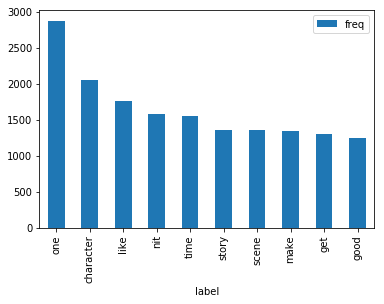

In [82]:
neg_word_freq_df[:10].plot.bar(x='label', y='freq')

In [83]:
strings = ' '

In [87]:
positive_lemma_text = strings.join(word_freq_df['label'])
negitive_lemma_text = strings.join(neg_word_freq_df['label'])

In [88]:
from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS)
stopwords.update(["movie", "film", "however", "also", "something", "become", "new"])

positive_wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      
                      stopwords = stopwords).generate(positive_lemma_text) 

negitive_wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      
                      stopwords = stopwords).generate(negitive_lemma_text) 

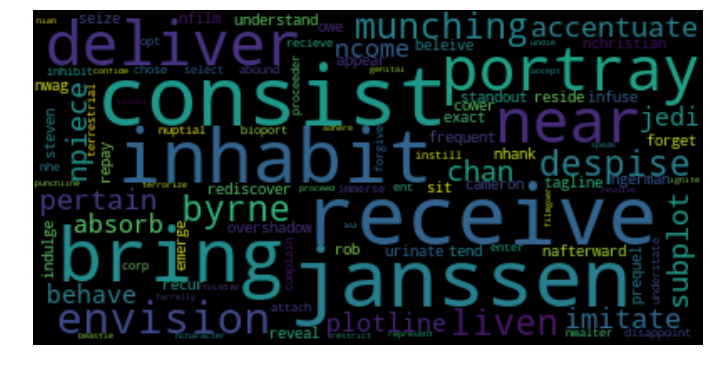

In [89]:
plt.figure(figsize=(12, 8))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

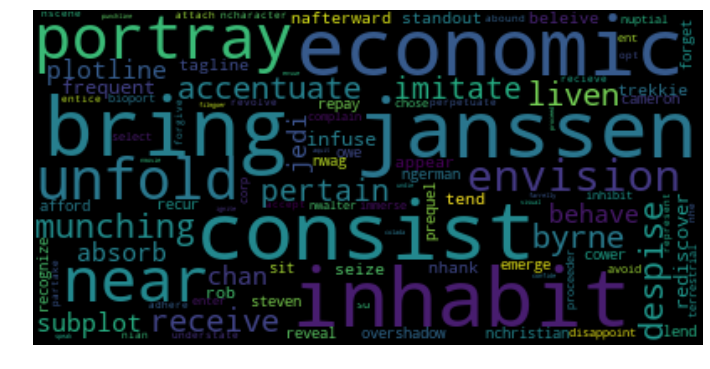

In [90]:
plt.figure(figsize=(12, 8))
plt.imshow(negitive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# TFIDF Transformer

In [99]:
import os


positive_doc = []
for filename in os.listdir(pos_directory):
    #print(type(filename))
    with open('reviews_dataset/pos/{}'.format(filename), 'r') as f:
        line = f.read()
        positive_doc.append(line)
        
        
negitive_doc = []
for filename in os.listdir(neg_directory):
    #print(type(filename))
    with open('reviews_dataset/neg/{}'.format(filename), 'r') as f:
        line = f.read()
        negitive_doc.append(line)


In [102]:
# TFIDF Transformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

positive_cv = CountVectorizer(listed_doc, ngram_range= (1,2), stop_words = stopwords, min_df=2, max_df=0.50)
positive_word_count = positive_cv.fit_transform(positive_doc)
positive_word_count


negitive_cv = CountVectorizer(listed_doc, ngram_range= (1,2), stop_words = stopwords, min_df=2, max_df=0.50)
negitive_word_count = negitive_cv.fit_transform(negitive_doc)
negitive_word_count


C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\envs\tensorflowproject\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  sorted(inconsistent))


<1000x39888 sparse matrix of type '<class 'numpy.int64'>'
	with 307260 stored elements in Compressed Sparse Row format>

In [104]:
positive_word_count.shape, negitive_word_count.shape

((1000, 43450), (1000, 39888))

In [105]:
pos_voc = positive_cv.vocabulary_
neg_voc = negitive_cv.vocabulary_

In [106]:
pos_text = strings.join(pos_voc)
neg_text = strings.join(neg_voc)

In [107]:
from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS)
stopwords.update(["movie", "film", "however", "also", "something", "become", "new"])

pos_wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      
                      stopwords = stopwords).generate(pos_text) 


neg_wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      
                      stopwords = stopwords).generate(neg_text) 

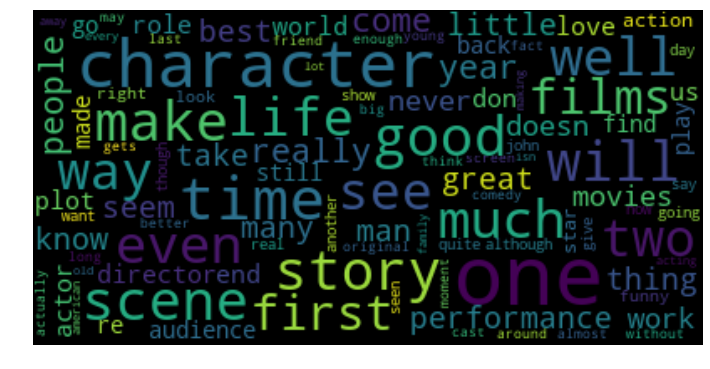

In [109]:
plt.figure(figsize=(12, 8))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

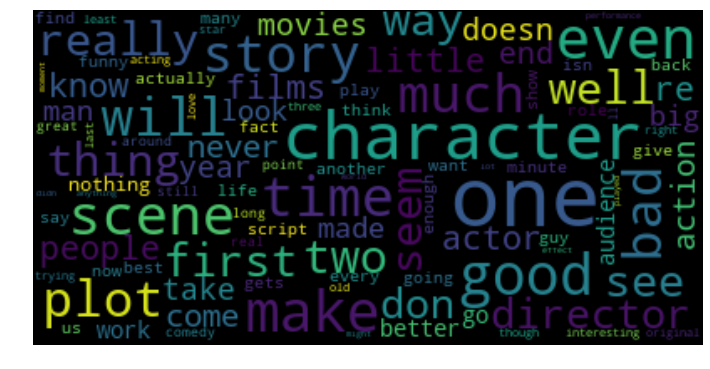

In [108]:
plt.figure(figsize=(12, 8))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [121]:
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(positive_word_count)


#for negitive words
negitive_tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
negitive_tfidf.fit(negitive_word_count)


TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [116]:
tfidf_transformer.idf_

array([6.81014249, 4.05860718, 6.81014249, ..., 6.81014249, 5.96284463,
       6.81014249])

In [117]:
cv.get_feature_names()[:10]

['00',
 '000',
 '000 000',
 '000 feet',
 '000 leagues',
 '000 times',
 '000 years',
 '007',
 '05',
 '10']

In [122]:
pos_tf_idf = pd.DataFrame(tfidf_transformer.idf_, index=positive_cv.get_feature_names(), columns=['idf_weights'])
neg_tf_idf = pd.DataFrame(negitive_tfidf.idf_, index=negitive_cv.get_feature_names(), columns=['idf_weights'])

In [123]:
neg_tf_idf.sort_values(by='idf_weights', ascending=False)

,idf_weights
little importance,6.810142
mighty mack,6.810142
miles apart,6.810142
mildly funny,6.810142
mildly entertaining,6.810142
...,...
director,1.751776
characters,1.737054
way,1.718439
first,1.700165


In [46]:
neg_tf_idf.sort_values(by='idf_weights', ascending=True)

,idf_weights
life,1.708246
best,1.714349
characters,1.718439
little,1.775357
people,1.784071
...,...
jailed,6.810142
jade,6.810142
jacques nolot,6.810142
james dean,6.810142


In [124]:
#TF-IDF scores.
#Once you have the IDF values, you can now compute the tf-idf scores for any document or set of documents. 

count_vector = cv.transform(listed_doc)
tf_idf_vector=tfidf_transformer.transform(count_vector)


ValueError: Input has n_features=39888 while the model has been trained with n_features=43450

In [51]:
feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)
 

,tfidf
ripper,0.185691
hell,0.156984
comic,0.131704
moore,0.127878
campbell,0.125779
...,...
flaws firstly,0.000000
flaws movie,0.000000
flaws one,0.000000
flaws prevent,0.000000


In [53]:
df.loc[df['tfidf'] !=0.0]

,tfidf
00,0.061897
102,0.061897
12,0.041277
1888,0.061897
30,0.037697
...,...
world enough,0.059282
world never,0.052982
worry,0.045120
would like,0.039831


# TFIDF Vectorizer

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(listed_doc)
tfidf_vectorizer_vectors

<1000x30325 sparse matrix of type '<class 'numpy.float64'>'
	with 345956 stored elements in Compressed Sparse Row format>

In [55]:
tfidf_vectorizer_vectors[0].T.todense()

matrix([[0.05669349],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]])

In [59]:
df_tfidf_vector = pd.DataFrame(tfidf_vectorizer_vectors[0].T.todense(), index = tfidf_vectorizer.get_feature_names(),
                              columns=['tfidf'])

In [66]:
df_tfidf_vector.sort_values(by='tfidf', ascending=False)

,tfidf
the,0.382944
and,0.174997
ripper,0.170080
in,0.150147
hell,0.143787
...,...
fifths,0.000000
fifth,0.000000
fifteen,0.000000
fiesty,0.000000


# ML

In [3]:
pos_directory = 'reviews_dataset/pos/'
neg_directory = 'reviews_dataset/neg/'

In [4]:
# train 
import os

positive_corpus = []
for filename in os.listdir(pos_directory):
    #print(type(filename))
    with open('reviews_dataset/pos/{}'.format(filename), 'r') as f:
        line = f.read()
        positive_corpus.append(line)

In [5]:
# test
import os

negitive_corpus = []
for filename in os.listdir(neg_directory):
    #print(filename)
    with open('reviews_dataset/neg/{}'.format(filename), 'r') as d:
        line = d.read()
        negitive_corpus.append(line)

In [6]:
df_pos = pd.DataFrame(positive_corpus, columns=['pos_text'])
df_pos['label'] = 1

In [8]:
df_neg = pd.DataFrame(negitive_corpus, columns=['neg_text'])
df_neg['label'] = 0

In [9]:
df_pos.columns = ['text', 'label']
df_neg.columns = ['text', 'label']

In [156]:
df_neg

,text,label
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard's quick movie review \ndamn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' firs...",0
4,synopsis : a mentally unstable man undergoing ...,0
...,...,...
995,"if anything , "" stigmata "" should be taken as ...",0
996,"john boorman's "" zardoz "" is a goofy cinematic...",0
997,the kids in the hall are an acquired taste . \...,0
998,there was a time when john carpenter was a gre...,0


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer 
stopwords = nltk.corpus.stopwords.words('english')
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)
 


In [37]:
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)

def tfidf_vec(df):
    tfidf_vectors = tfidf_vectorizer.fit_transform(df)
    return tfidf_vectors

In [12]:
df_all = df_pos.append(df_neg)
df_all.index = range(len(df_all['text']))
df_all

,text,label
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",0
1996,"john boorman's "" zardoz "" is a goofy cinematic...",0
1997,the kids in the hall are an acquired taste . \...,0
1998,there was a time when john carpenter was a gre...,0


In [38]:
X = tfidf_vec(df_all['text'])
y = df_all['label'].values

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [40]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [33]:
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)
def predict_review(text, algo_obj):
    clean_text = text.strip()
    transformed = tfidf_vectorizer.transform([clean_text])
    if algo_obj.predict(transformed) ==1:
        return "It's a positive review"
    else: 
        return "It's a negitive review"
    
    
def accuracy_metrics(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

In [41]:
#Naive Bayes Classifier 

In [41]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)


In [42]:
nb_scores = cross_val_score(nb, X, y, cv=6)
print("score", nb_scores)

score [0.80239521 0.84730539 0.83233533 0.80239521 0.84337349 0.8253012 ]


In [19]:
nb_scores = cross_val_score(nb, X, y, cv=6)
print("score", nb_scores)

predictions = cross_val_predict(nb, X, y, cv=6)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

score [0.80239521 0.84730539 0.83233533 0.80239521 0.84337349 0.8253012 ]
Cross-Predicted Accuracy: 0.30200000000000005


In [ ]:
#Random Forest

In [20]:
rfc = RandomForestClassifier(random_state=42)

In [21]:
param_grid = { 
    'n_estimators': [100, 500, 800],
    'max_features': ['auto'],
    'max_depth' : [8, 9],
    'criterion' :['gini']
}

In [22]:
%%time
CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

Wall time: 5min 3s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [91]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [23]:
random_classifier = RandomForestClassifier(n_estimators = 1000, max_depth = 8, random_state = 42, criterion = 'gini')
random_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
forest_pred = random_classifier.predict(x_test)

In [25]:
accuracy_metrics(y_test, forest_pred)

0.8183333333333334

In [50]:
#Logistic regression

In [28]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
log_pred = reg.predict(x_test)

In [5]:
naive_bayes = (accuracy_metrics(y_test, nb_pred))*100
random_forest = (accuracy_metrics(y_test, forest_pred))*100
logistic_regression = (accuracy_metrics(y_test, log_pred))*100

NameError: name 'accuracy_metrics' is not defined

In [4]:
metrics = [naive_bayes, random_forest, logistic_regression]

NameError: name 'naive_bayes' is not defined

In [3]:
pd.DataFrame(metrics, index=['naive_bayes', 'random_forest','logistic_regression'], columns=['metrics'])

NameError: name 'metrics' is not defined

In [32]:
pd.DataFrame(metrics, index=['naive_bayes', 'random_forest','logistic_regression'], columns=['metrics'])

,metrics
naive_bayes,80.333333
random_forest,81.833333
logistic_regression,81.333333


In [ ]:
#Test reviews

In [58]:

test_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)
#keywords_df = pd.DataFrame(data, columns= ['tfidf'])
'''
def extract_tfidf(transformed):
    dummy_df = pd.DataFrame(transformed.T.todense(), index = test_vectorizer.get_feature_names(), columns=['tfidf'])
    return dummy_df.sort_values(by='tfidf', ascending=False)
'''
    
def predict_review(text):
    clean_text = text.strip()
    transformed = tfidf_vectorizer.transform([clean_text])
    if random_classifier.predict(transformed) ==1:
        return "It's a positive review"
    else: 
        return "It's a negitive review"

In [46]:
predict_review("The acting, cinematography, sound design, and the script itself is phenomenal. This movie is a triumph. Joaquin Pheonix deserves an Oscar win for this tbh.")

"It's a positive review"

In [35]:
joker_review = 'The acting, cinematography, sound design, and the script itself is phenomenal. This movie is a triumph. Joaquin Pheonix deserves an Oscar win for this tbh.'

In [68]:
clean_text = joker_review.strip()
clean_text = tfidf_vec([clean_text])

In [63]:
result = test_vectorizer.fit_transform([clean_text])

In [47]:
jason_review = "For Jason Bourne, who rises and rises again in this fantastically kinetic, propulsive film, resurrection is the name of the game, just as it is for franchises"

In [62]:
predict_review("Zero leaves you with a bittersweet feeling.")

"It's a positive review"

In [59]:
saho_review = "Saaho is a missed opportunity with a juvenile narrative and weak story line"

In [60]:
saho_review

'Saaho is a missed opportunity with a juvenile narrative and weak story line'

In [174]:
rev_vector = tfidf_vectorizer.transform([joker_review])

In [176]:
random_classifier.predict(rev_vector)

ValueError: Number of features of the model must match the input. Model n_features is 567258 and input n_features is 27 

In [155]:
dummy_df = pd.DataFrame(rev_vector.T.todense(), index = test_vectorizer.get_feature_names(), columns=['tfidf'])

In [158]:
dummy_df.sort_values(by='tfidf', ascending=False)

,tfidf
acting,0.19245
phenomenal,0.19245
win,0.19245
triumph joaquin,0.19245
triumph,0.19245
tbh,0.19245
sound design,0.19245
sound,0.19245
script phenomenal,0.19245
script,0.19245


In [ ]:
# Learning/rough work.

In [139]:
dummy_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)

In [23]:
rev = "‘Padmaavat’ is an entertaining, large canvas experience, brought to life by strong performances combined with Sanjay Leela Bhansali’s stroke of visual brilliance."
rev = rev.strip()

In [140]:
joker_review = 'The acting, cinematography, sound design, and the script itself is phenomenal. This movie is a triumph. Joaquin Pheonix deserves an Oscar win for this tbh.'

In [161]:
res = tfidf_vectorizer.transform([joker_review])

In [162]:
res

<1x567258 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [165]:
dummy_df = pd.DataFrame(res.T.todense(), index = tfidf_vectorizer.get_feature_names(), columns=['tfidf'])

In [166]:
dummy_df.loc[dummy_df['tfidf'] > 0]

,tfidf
acting,0.121590
cinematography,0.196576
deserves,0.205000
deserves oscar,0.366582
design,0.223222
joaquin,0.325244
movie,0.065650
oscar,0.177549
oscar win,0.393364
phenomenal,0.302420


In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 


In [40]:
sent_obj = SentimentIntensityAnalyzer()

In [42]:
scores = sent_obj.polarity_scores(joker_review)

In [52]:
scores['compound']

0.7845